# Check Regression Assumptions

Haytham Mohamed - INFS890 Spring 2020

This notebook is to check regression Normality and Linearity assumptions of the orders work flow.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats
from sklearn.decomposition import PCA

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

In [132]:
# 1- read processed file

home_dir = '/Users/hmohamed/github/data-research-spring2020/sock-shop'

file_dir = home_dir + '/processed-data/'
input_file = 'order_flow_cleanup_data.csv'

save=True

In [133]:
def read_df(file_dir, data_file):
    df = pd.read_csv(file_dir + data_file)
    return to_time_series(df)

def to_time_series(df, index_col_name='date'):
    df[index_col_name] = pd.to_datetime(df[index_col_name])
    df.set_index(index_col_name, inplace=True)
    df.sort_index(inplace=True)
    return df

In [134]:
orders_flow_df = read_df(file_dir, input_file)
idx = orders_flow_df.index
orders_flow_df.head(5) 

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,orders-db_pods,user_pods,user-db_pods,shipping_pods,payment_pods,carts_pods,carts-db_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,0.030,0.010,0.010,0.010,0.010,0.010,0.010,0.030,0.070,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.500,0.150,0.240
2020-03-26 19:46:37,0.060,0.020,0.020,0.020,0.020,0.010,0.010,0.180,0.180,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.890,0.150,0.240
2020-03-26 19:46:52,0.070,0.030,0.020,0.030,0.020,0.010,0.010,0.440,0.200,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.350,0.150,0.240
2020-03-26 19:47:07,0.070,0.030,0.020,0.020,0.020,0.010,0.010,0.230,0.170,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.260,0.130,0.240
2020-03-26 19:47:22,0.070,0.020,0.010,0.020,0.020,0.010,0.010,0.240,0.140,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.280,0.360,0.240


In [135]:
orders_flow_df.shape

(6756, 21)

# Examine the data

In [136]:
orders_flow_df.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,orders-db_pods,user_pods,user-db_pods,shipping_pods,payment_pods,carts_pods,carts-db_pods,nodes_cpu_use,orders_req,orders_ltcy
count,"6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000",...,"6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000","6,756.000"
mean,0.827,0.212,0.020,0.199,0.119,0.052,0.032,0.530,1.828,2.757,...,1.000,2.761,1.000,2.761,2.761,2.761,1.000,4.104,5.036,2.967
std,0.617,0.132,0.005,0.135,0.080,0.044,0.012,0.575,1.991,1.097,...,0.000,1.092,0.000,1.092,1.092,1.092,0.000,2.084,4.202,3.510
min,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.030,0.010,0.500,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.100,0.000,0.040
25%,0.190,0.080,0.020,0.050,0.030,0.040,0.020,0.120,0.020,2.000,...,1.000,2.000,1.000,2.000,2.000,2.000,1.000,1.910,0.485,0.240
50%,0.840,0.220,0.020,0.200,0.120,0.050,0.030,0.320,1.150,3.000,...,1.000,3.000,1.000,3.000,3.000,3.000,1.000,4.210,5.160,0.490
75%,1.292,0.300,0.020,0.300,0.180,0.060,0.040,0.580,3.282,4.000,...,1.000,4.000,1.000,4.000,4.000,4.000,1.000,5.780,8.200,5.788
max,2.730,0.910,0.040,0.640,0.340,0.630,0.100,2.530,6.580,4.000,...,1.000,4.000,1.000,4.000,4.000,4.000,1.000,9.660,20.130,9.730


# Check Regression Assumptions

## 1- Normality

Examining the Normal Probability Distribution for the rest of the variables

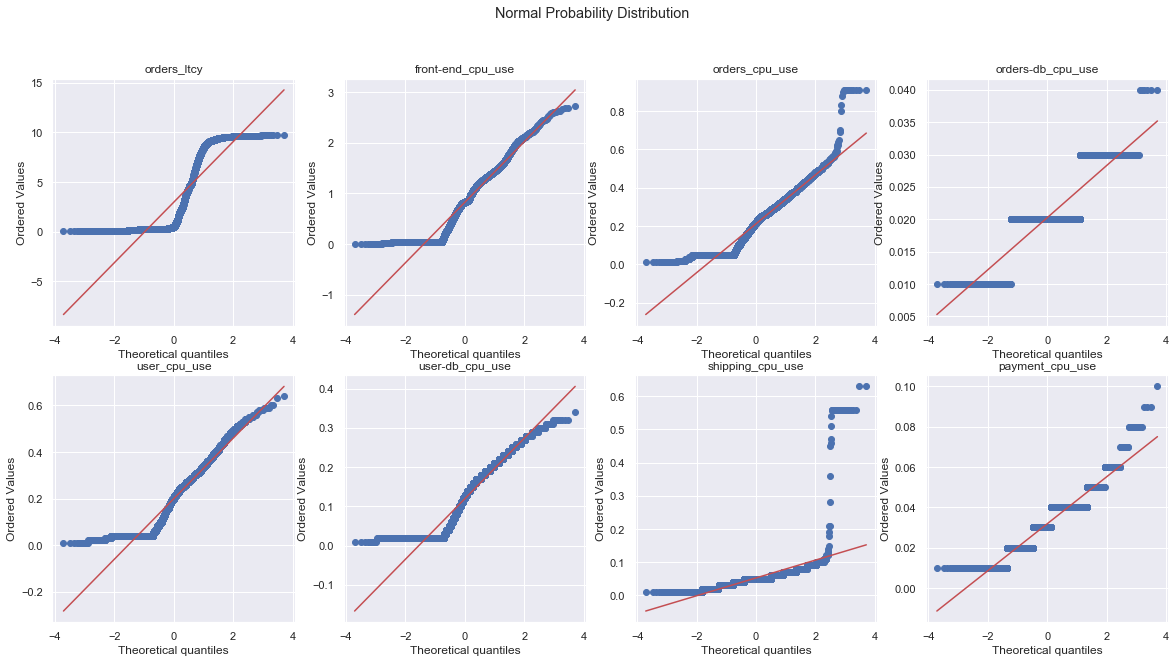

In [137]:
fig, ax = plt.subplots(2,4,figsize=(20,10))

# log_ltcy should look ok as its transformed above
stats.probplot(orders_flow_df['orders_ltcy'], plot=ax[0,0])
ax[0, 0].set_title('orders_ltcy')

stats.probplot(orders_flow_df['front-end_cpu_use'], plot=ax[0,1])
ax[0, 1].set_title('front-end_cpu_use')

stats.probplot(orders_flow_df['orders_cpu_use'], plot=ax[0,2])
ax[0, 2].set_title('orders_cpu_use')

stats.probplot(orders_flow_df['orders-db_cpu_use'], plot=ax[0,3])
ax[0, 3].set_title('orders-db_cpu_use')

stats.probplot(orders_flow_df['user_cpu_use'], plot=ax[1,0])
ax[1, 0].set_title('user_cpu_use')

stats.probplot(orders_flow_df['user-db_cpu_use'], plot=ax[1,1])
ax[1, 1].set_title('user-db_cpu_use')

stats.probplot(orders_flow_df['shipping_cpu_use'], plot=ax[1,2])
ax[1, 2].set_title('shipping_cpu_use')

stats.probplot(orders_flow_df['payment_cpu_use'], plot=ax[1,3])
ax[1, 3].set_title('payment_cpu_use')



fig.suptitle('Normal Probability Distribution')
plt.show()

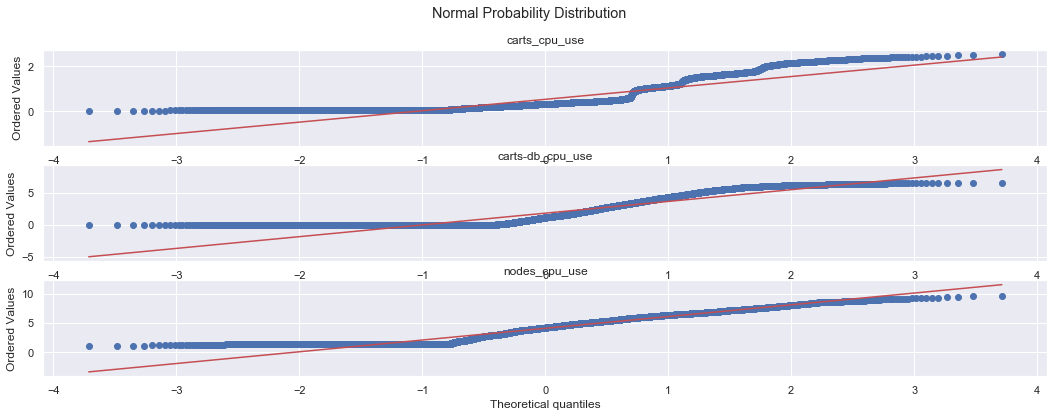

In [138]:
fig, ax = plt.subplots(3,figsize=(18,6))

stats.probplot(orders_flow_df['carts_cpu_use'], plot=ax[0])
ax[0].set_title('carts_cpu_use')

stats.probplot(orders_flow_df['carts-db_cpu_use'], plot=ax[1])
ax[1].set_title('carts-db_cpu_use')

stats.probplot(orders_flow_df['nodes_cpu_use'], plot=ax[2])
ax[2].set_title('nodes_cpu_use')

#stats.probplot(orders_flow_df['svc_req_size'], plot=ax[1,0])
#ax[1, 0].set_title('svc_req_size')

#stats.probplot(orders_flow_df['svc_resp_size'], plot=ax[1,1])
#ax[1, 1].set_title('svc_resp_size')

#stats.probplot(orders_flow_df['svc_pods'], plot=ax[1,2])
#ax[1, 2].set_title('svc_pods')

#stats.probplot(orders_flow_df['svc_req_rate'], plot=ax[2,0])
#ax[2, 0].set_title('svc_req_rate')

fig.suptitle('Normal Probability Distribution')
plt.show()

above Normal Probability Plots (MPP) illustrates so low variance for "orders-db_cpu_use" variable. Apparently, the orders-db_cpu_use is not affected when applying different loads to the application. We will drop this varible and not consider it.

In [139]:
orders_flow_df = orders_flow_df.drop('orders-db_cpu_use', 1)

# Checking Regression Assumptions

## Linearity

examine features to target scatterplot

In [140]:
variables = orders_flow_df.columns.values
for var in variables:
    print(var)

front-end_cpu_use
orders_cpu_use
user_cpu_use
user-db_cpu_use
shipping_cpu_use
payment_cpu_use
carts_cpu_use
carts-db_cpu_use
front-end_pods
orders_pods
orders-db_pods
user_pods
user-db_pods
shipping_pods
payment_pods
carts_pods
carts-db_pods
nodes_cpu_use
orders_req
orders_ltcy


Plot every variable against the latency 

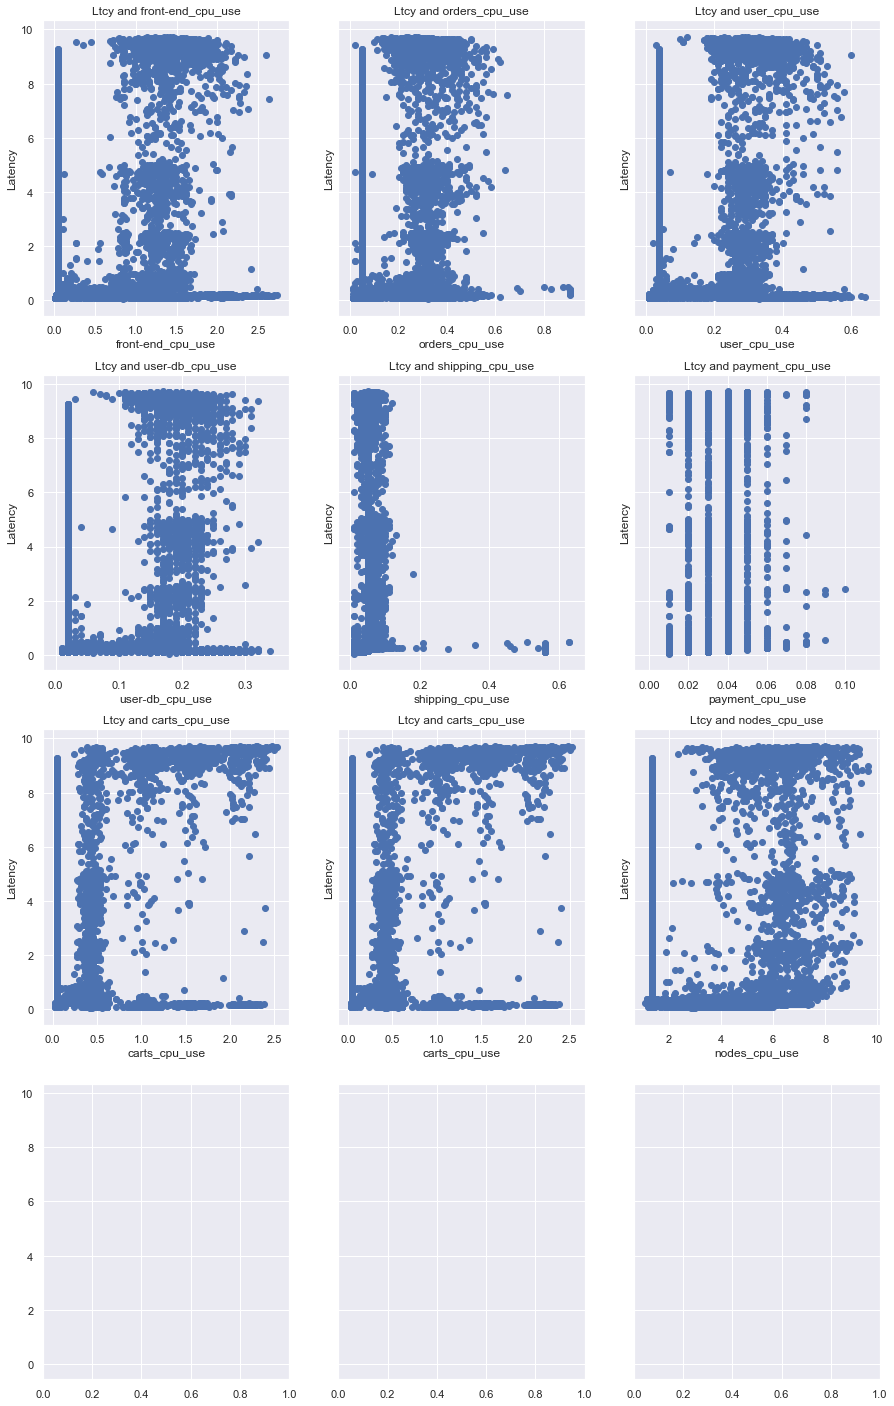

In [141]:
f, ax = plt.subplots(4, 3, sharey=True, figsize = (15,25))

ax[0,0].scatter(orders_flow_df['front-end_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,0].set_title('Ltcy and front-end_cpu_use')
ax[0,0].set_xlabel('front-end_cpu_use')
ax[0,0].set_ylabel('Latency')

ax[0,1].scatter(orders_flow_df['orders_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,1].set_title('Ltcy and orders_cpu_use')
ax[0,1].set_xlabel('orders_cpu_use')
ax[0,1].set_ylabel('Latency')

ax[0,2].scatter(orders_flow_df['user_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,2].set_title('Ltcy and user_cpu_use')
ax[0,2].set_xlabel('user_cpu_use')
ax[0,2].set_ylabel('Latency')

ax[1,0].scatter(orders_flow_df['user-db_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,0].set_title('Ltcy and user-db_cpu_use')
ax[1,0].set_xlabel('user-db_cpu_use')
ax[1,0].set_ylabel('Latency')

ax[1,1].scatter(orders_flow_df['shipping_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,1].set_title('Ltcy and shipping_cpu_use')
ax[1,1].set_xlabel('shipping_cpu_use')
ax[1,1].set_ylabel('Latency')

ax[1,2].scatter(orders_flow_df['payment_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,2].set_title('Ltcy and payment_cpu_use')
ax[1,2].set_xlabel('payment_cpu_use')
ax[1,2].set_ylabel('Latency')

ax[2,0].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,0].set_title('Ltcy and carts_cpu_use')
ax[2,0].set_xlabel('carts_cpu_use')
ax[2,0].set_ylabel('Latency')

ax[2,1].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,1].set_title('Ltcy and carts_cpu_use')
ax[2,1].set_xlabel('carts_cpu_use')
ax[2,1].set_ylabel('Latency')

ax[2,2].scatter(orders_flow_df['nodes_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,2].set_title('Ltcy and nodes_cpu_use')
ax[2,2].set_xlabel('nodes_cpu_use')
ax[2,2].set_ylabel('Latency')



plt.show()

In [142]:
if save:
    orders_flow_df.to_csv(path_or_buf=file_dir + 'order_flow_normalized_data.csv', index=True)

# Standardize Features

In [143]:
# Also save a standard normalized data to use with MLP

from sklearn.preprocessing import StandardScaler

targets = orders_flow_df['orders_ltcy']
inputs = orders_flow_df.drop(['orders_ltcy'], axis=1)

variables = inputs.columns.values

print('shape of inputs %', inputs.shape)

scaler = StandardScaler()
scaler.fit(inputs)
standarized_inputs = scaler.transform(inputs)
standarized_inputs = pd.DataFrame(standarized_inputs, columns=variables)

targets = pd.DataFrame(targets.values, columns=['orders_ltcy'])

scaled_data = pd.concat([standarized_inputs,targets], axis=1, sort=False)
scaled_data['date'] = idx
scaled_data = to_time_series(scaled_data)

if save:
     scaled_data.to_csv(path_or_buf=file_dir + 'order_flow_standardized_data.csv', index=True)
        
scaled_data.head()        
    

shape of inputs % (6756, 19)


,front-end_cpu_use,orders_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,orders-db_pods,user_pods,user-db_pods,shipping_pods,payment_pods,carts_pods,carts-db_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,-1.292,-1.529,-1.401,-1.360,-0.956,-1.791,-0.869,-0.883,-1.602,-1.613,0.000,-1.613,0.000,-1.613,-1.613,-1.613,0.000,-0.770,-1.163,0.240
2020-03-26 19:46:37,-1.243,-1.453,-1.327,-1.236,-0.956,-1.791,-0.608,-0.828,-1.602,-1.613,0.000,-1.613,0.000,-1.613,-1.613,-1.613,0.000,-1.063,-1.163,0.240
2020-03-26 19:46:52,-1.227,-1.378,-1.253,-1.236,-0.956,-1.791,-0.156,-0.818,-1.602,-1.613,0.000,-1.613,0.000,-1.613,-1.613,-1.613,0.000,-1.322,-1.163,0.240
2020-03-26 19:47:07,-1.227,-1.378,-1.327,-1.236,-0.956,-1.791,-0.521,-0.833,-1.602,-1.613,0.000,-1.613,0.000,-1.613,-1.613,-1.613,0.000,-1.365,-1.168,0.240
2020-03-26 19:47:22,-1.227,-1.453,-1.327,-1.236,-0.956,-1.791,-0.503,-0.848,-1.602,-1.613,0.000,-1.613,0.000,-1.613,-1.613,-1.613,0.000,-1.356,-1.113,0.240
